<a href="https://colab.research.google.com/github/ssobranding/Portfolio/blob/main/1_Portfolio_PUBG_Winner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data open & load
***

In [ ]:
# Import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
# Data type
dtypes = {
        'assists'           : 'uint8',
        'boosts'            : 'uint8',
        'damageDealt'       : 'float16',
        'DBNOs'             : 'uint8',
        'headshotKills'     : 'uint8',
        'heals'             : 'uint8',
        'killPlace'         : 'uint8',
        'killPoints'        : 'uint16',
        'kills'             : 'uint8',
        'killStreaks'       : 'uint8',
        'longestKill'       : 'float16',
        'matchDuration'     : 'uint8',
        'maxPlace'          : 'uint8',
        'numGroups'         : 'uint8',
        'rankPoints'        : 'uint8',
        'revives'           : 'uint8',
        'rideDistance'      : 'float16',
        'roadKills'         : 'uint8',
        'swimDistance'      : 'float16',
        'teamKills'         : 'uint8',
        'vehicleDestroys'   : 'uint8',
        'walkDistance'      : 'float16',
        'weaponsAcquired'   : 'uint8',
        'winPoints'         : 'uint8',
        'winPlacePerc'      : 'float16'
}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data with specified data type
data=pd.read_csv("/content/drive/MyDrive/데이터 분석/데이터 테이블/배틀그라운드/train_V2.csv",dtype=dtypes)

# Data Inquiry and Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          uint8  
 4   boosts           uint8  
 5   damageDealt      float16
 6   DBNOs            uint8  
 7   headshotKills    uint8  
 8   heals            uint8  
 9   killPlace        uint8  
 10  killPoints       uint16 
 11  kills            uint8  
 12  killStreaks      uint8  
 13  longestKill      float16
 14  matchDuration    uint8  
 15  matchType        object 
 16  maxPlace         uint8  
 17  numGroups        uint8  
 18  rankPoints       uint8  
 19  revives          uint8  
 20  rideDistance     float16
 21  roadKills        uint8  
 22  swimDistance     float16
 23  teamKills        uint8  
 24  vehicleDestroys  uint8  
 25  walkDistance     float16
 26  weaponsAcquired  uint8  
 27  winPoints   

In [ ]:
# Data Verification
print(data.head())

               Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0      0.00000      0              0      0         60  ...        0   
1     91.50000      0              0      0         57  ...        0   
2     68.00000      0              0      0         47  ...        0   
3     32.90625      0              0      0         75  ...        0   
4    100.00000      0              0      0         45  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0      0.000000          0      0.000000          0               0   
1   

In [ ]:
# matchType Verification
set(data["matchType"])

{'crashfpp',
 'crashtpp',
 'duo',
 'duo-fpp',
 'flarefpp',
 'flaretpp',
 'normal-duo',
 'normal-duo-fpp',
 'normal-solo',
 'normal-solo-fpp',
 'normal-squad',
 'normal-squad-fpp',
 'solo',
 'solo-fpp',
 'squad',
 'squad-fpp'}

In [ ]:
# Check Missing Values
print(data.isnull().sum())

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64


In [ ]:
# Remove Missing Values
data.dropna(subset=['winPlacePerc'], inplace=True)
print(data.isnull().sum())

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64


In [ ]:
## Creating Derived Variables

# Total distance
data['totalDistance'] = data['walkDistance'] + data['rideDistance'] + data['swimDistance']

# Categorical total distance
data['category_distance'] = pd.cut(data['totalDistance'], [0, 500, 1000, 1500, 2500, 5000, 10000, 20000],
      labels = ['0-500', '500-1000', '1000-1500', '1500-2500', '2500-5000', '5000-10000','10000-20000'])

# Combat engagement
data['totalDistance'] = data['totalDistance'].astype('float32') # 데이터 타입 변경
data['killEngagement'] = (data['kills'] + data['assists'] + data['DBNOs']) / data['totalDistance']

# Total items
data["totalItem"]=data["boosts"]+data["heals"]

In [ ]:
# Remove Outliers
data = data[~((data['totalDistance'] == 0))]
data = data[~((data['walkDistance'] == 0))]

# Correlation of Variables with Win Percentage

<ipython-input-16-0631a856f168>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


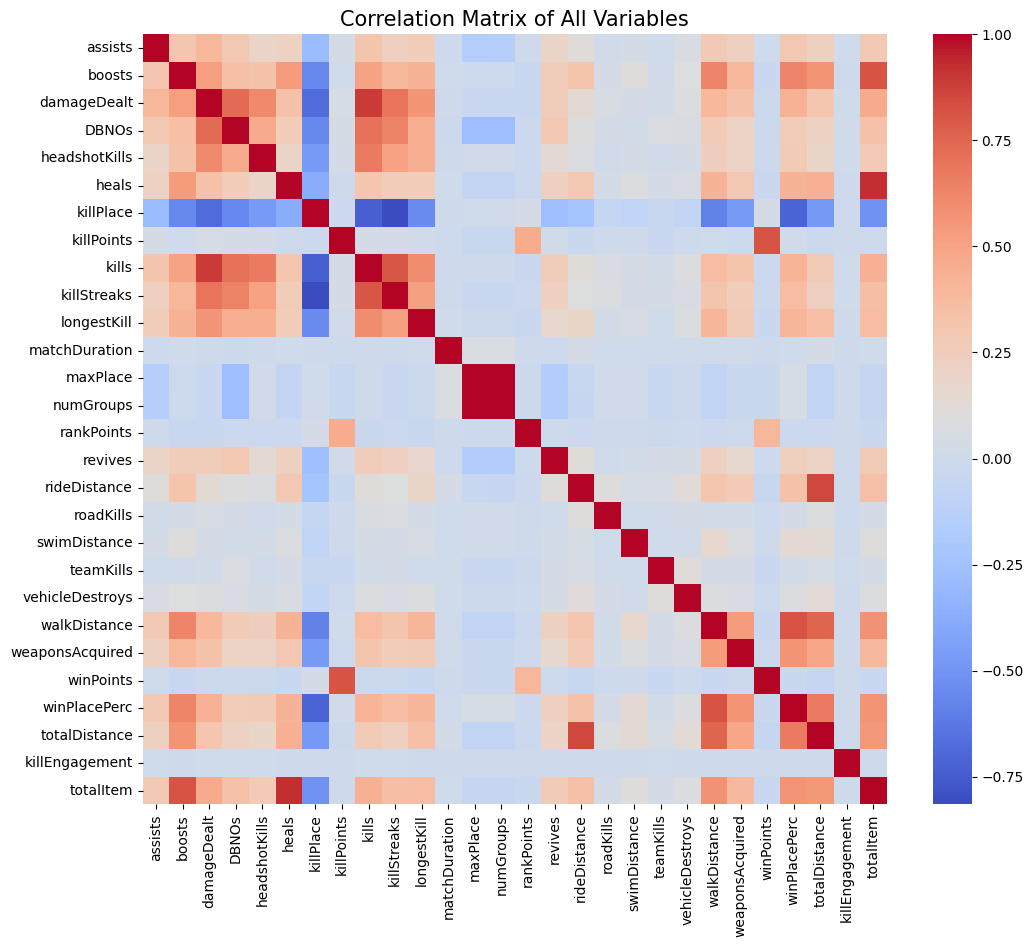

In [ ]:
# Calculate Correlation
correlation_matrix = data.corr()

# Visualisation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of All Variables', size=15)
plt.show()

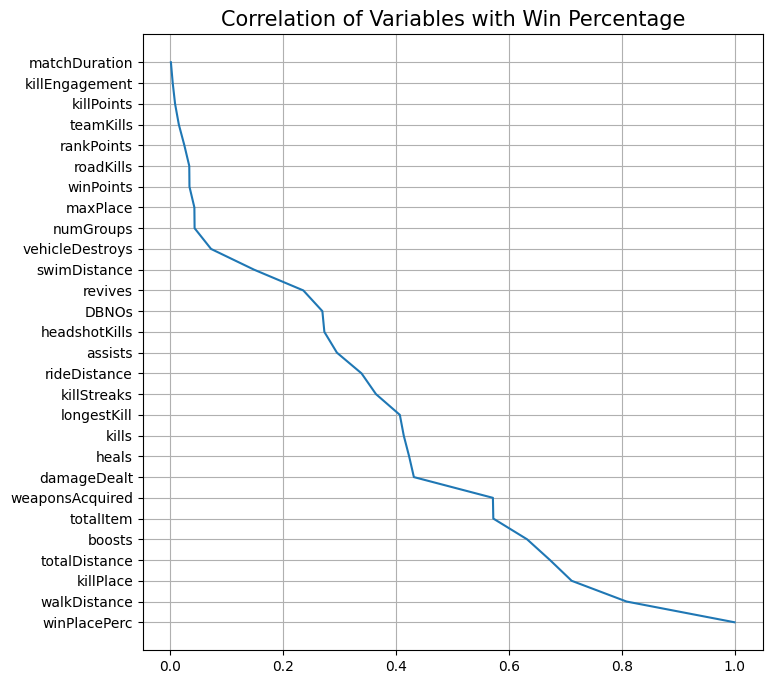

In [ ]:
# Correlation of Variables with Win Percentage
win_correlation = abs(correlation_matrix['winPlacePerc']).sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(8,8))
plt.plot(win_correlation.values, win_correlation.index)
plt.title('Correlation of Variables with Win Percentage', size=15)
plt.grid(True)
plt.show()

<ipython-input-18-771c2d0284f2>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  win_cor_solo=abs(win_cor_solo.corr().winPlacePerc).sort_values(ascending=False)
<ipython-input-18-771c2d0284f2>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  win_cor_duo=abs(win_cor_duo.corr().winPlacePerc).sort_values(ascending=False)
<ipython-input-18-771c2d0284f2>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  win_cor_squad=abs(win_cor_squad.corr().winPlacePerc).sort_values(ascending=Fals

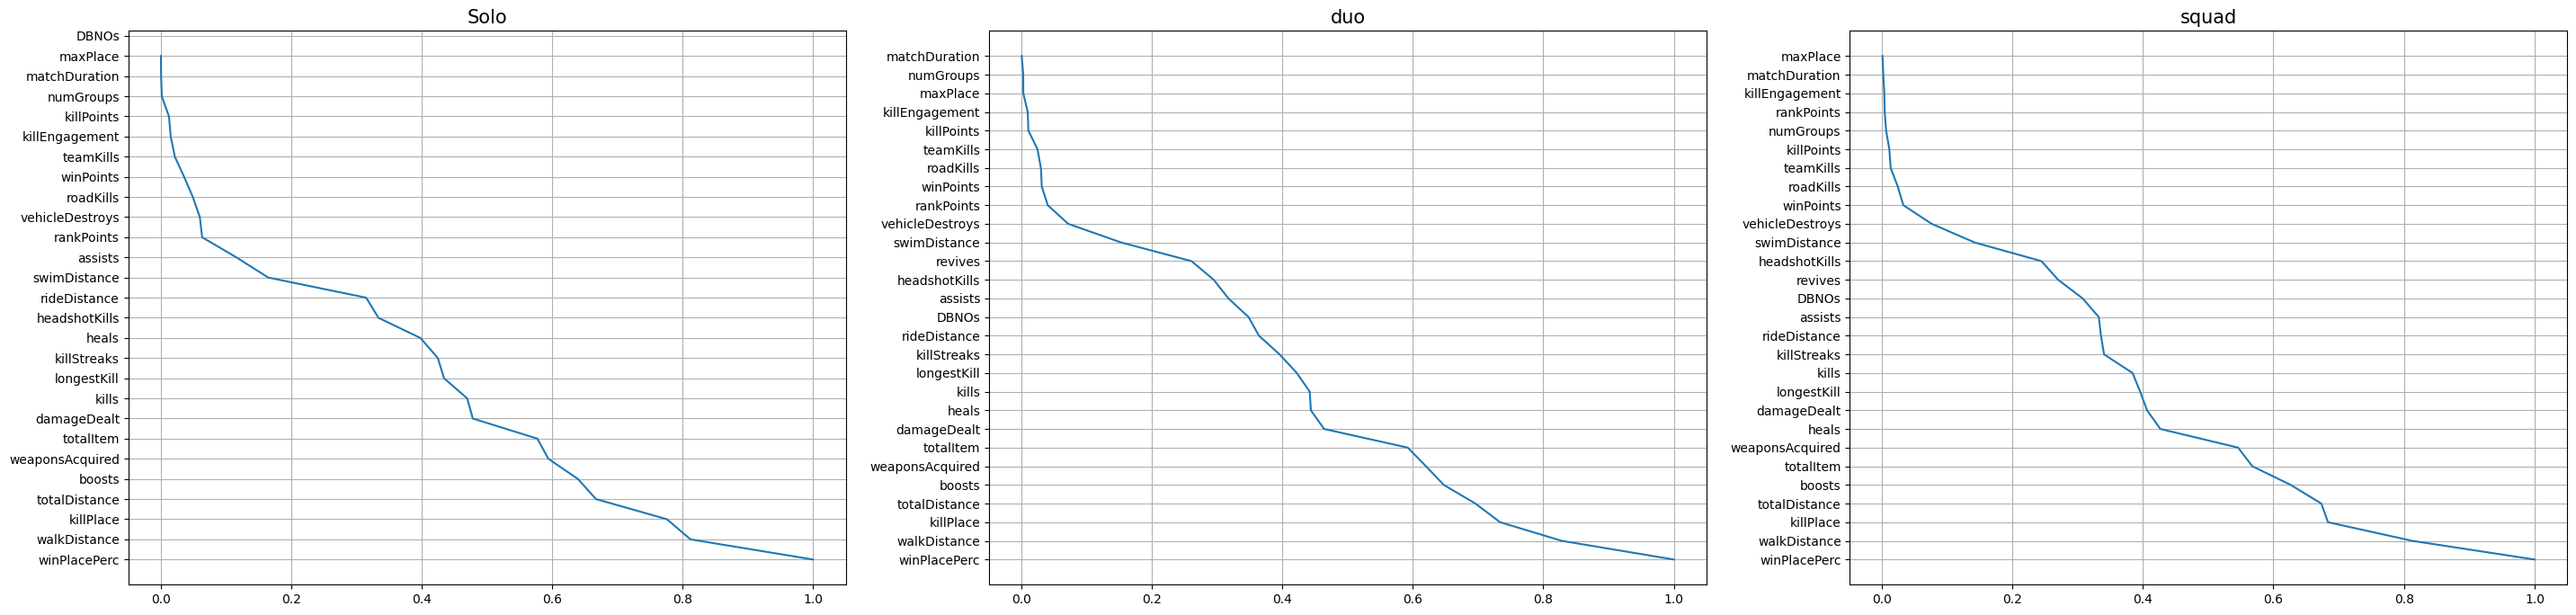

In [ ]:
# Comparison by Match Type

# Data Filtering
# solo
win_cor_solo=data[data["matchType"].str.contains("solo")]
win_cor_solo=abs(win_cor_solo.corr().winPlacePerc).sort_values(ascending=False)
# duo
win_cor_duo=data[data["matchType"].str.contains("duo")]
win_cor_duo=abs(win_cor_duo.corr().winPlacePerc).sort_values(ascending=False)
# squad
win_cor_squad=data[data["matchType"].str.contains("squad")]
win_cor_squad=abs(win_cor_squad.corr().winPlacePerc).sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(35,8))
# solo
plt.subplot(1, 3, 1)
plt.grid(True)
plt.plot(win_cor_solo.values, win_cor_solo.index)
plt.title('Solo', size=15)
# duo
plt.subplot(1, 3, 2)
plt.grid(True)
plt.plot(win_cor_duo.values, win_cor_duo.index)
plt.title('duo', size=15)
# squad
plt.subplot(1, 3, 3)
plt.grid(True)
plt.plot(win_cor_squad.values, win_cor_squad.index)
plt.title('squad', size=15)
plt.show()

# Distance Analysis

       walkDistance  rideDistance  swimDistance  totalDistance  winPlacePerc
count  4.347363e+06  4.347363e+06     4347363.0   4.347363e+06  4.347363e+06
mean            NaN           NaN           NaN   1.805230e+03           NaN
std             NaN           NaN           NaN   2.191408e+03  0.000000e+00
min    1.000166e-04  0.000000e+00           0.0   1.000166e-04  0.000000e+00
25%    1.723750e+02  0.000000e+00           0.0   1.758750e+02  2.143555e-01
50%    7.330000e+02  0.000000e+00           0.0   8.585000e+02  4.680176e-01
75%    2.008000e+03  8.806250e+01           0.0   2.774000e+03  7.500000e-01
max    2.577600e+04  4.070400e+04        3824.0   4.128000e+04  1.000000e+00


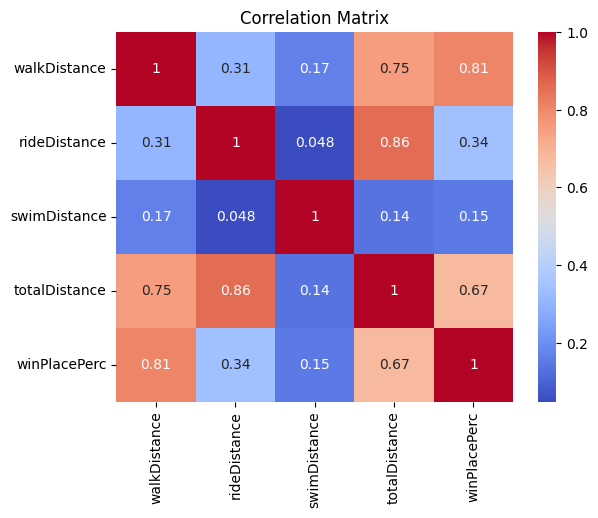

In [ ]:
# Descriptive Statistics
print(data[['walkDistance', 'rideDistance', 'swimDistance', 'totalDistance', 'winPlacePerc']].describe())

# Correlation Analysis
correlation = data[['walkDistance', 'rideDistance', 'swimDistance', 'totalDistance', 'winPlacePerc']].corr()
# Visualisation
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

<ipython-input-20-5c4991da4e95>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category_distance', y='winPlacePerc', data=data, palette='YlGnBu')


Text(0.5, 1.0, 'Distance by Winplaceperc')

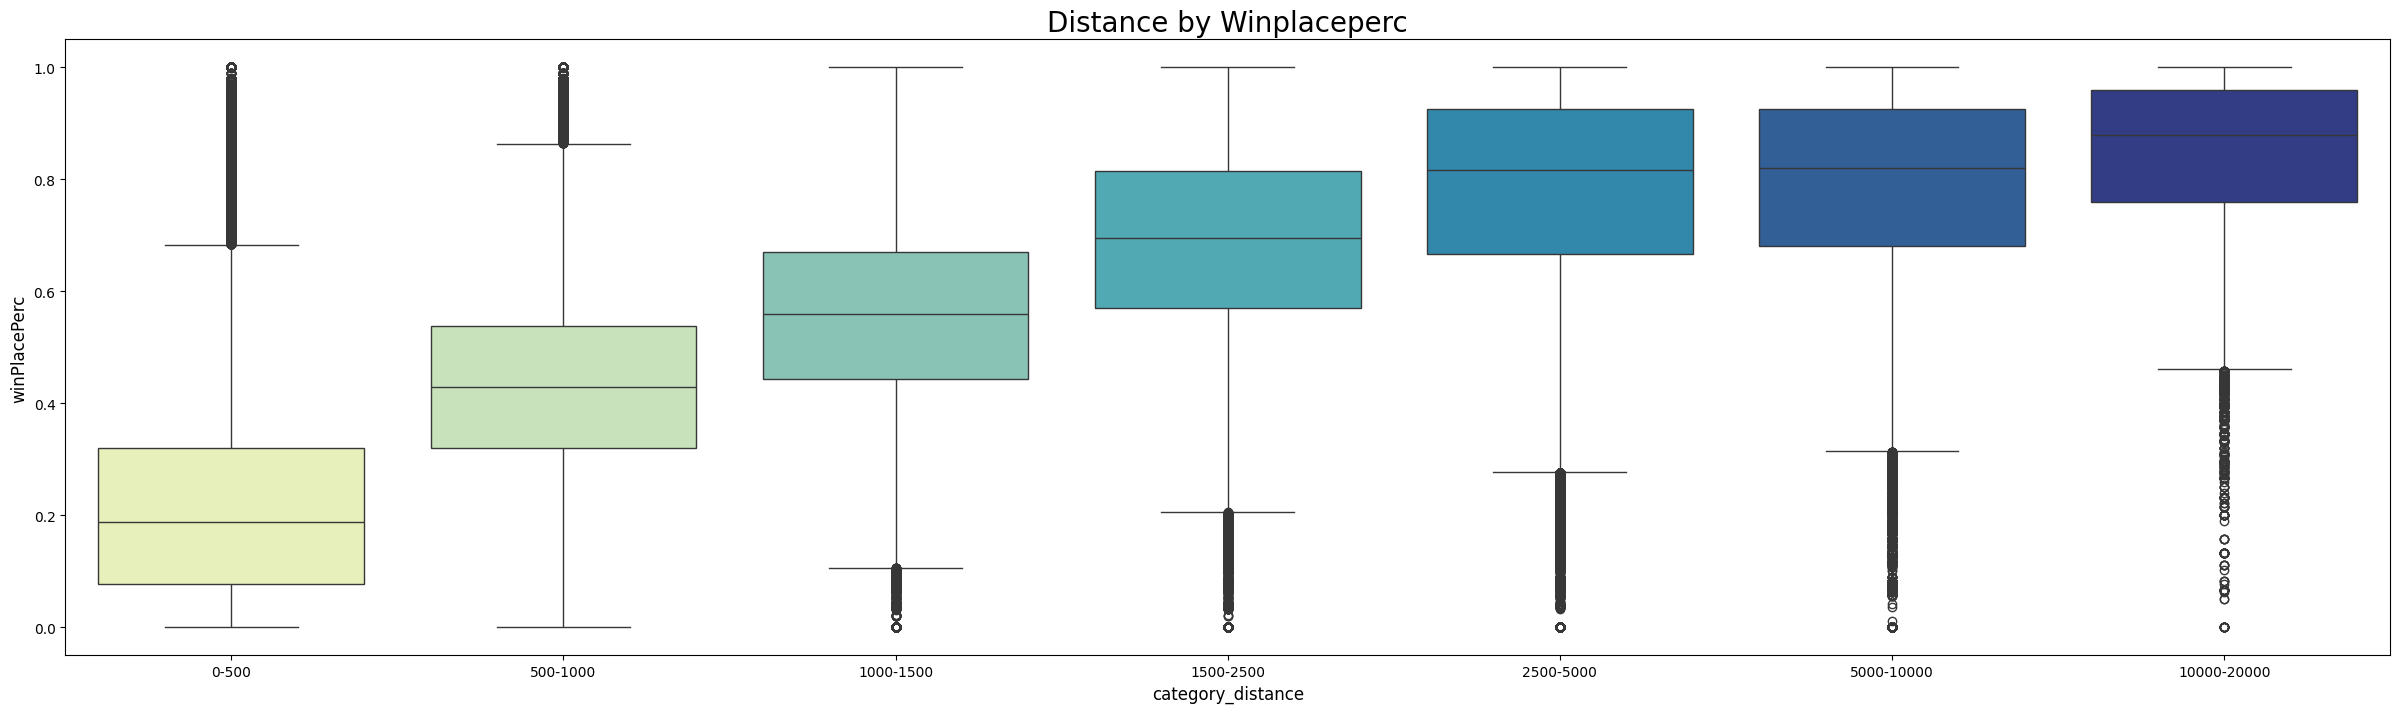

In [ ]:
# Win Rate by Total Distance Category

plt.figure(figsize=(30, 8))
sns.boxplot(x='category_distance', y='winPlacePerc', data=data, palette='YlGnBu')
plt.xlabel("category_distance",size=12)
plt.ylabel("winPlacePerc",size=12)
plt.title('Distance by Winplaceperc',size=20)

<ipython-input-21-f29de304e141>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category_distance', y='walkDistance', data=data, palette="Reds")
<ipython-input-21-f29de304e141>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category_distance', y='rideDistance', data=data, palette="Greens")
<ipython-input-21-f29de304e141>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category_distance', y='swimDistance', data=data, palette="Blues")


Text(0.5, 1.0, 'Swim Distance by Total Distance')

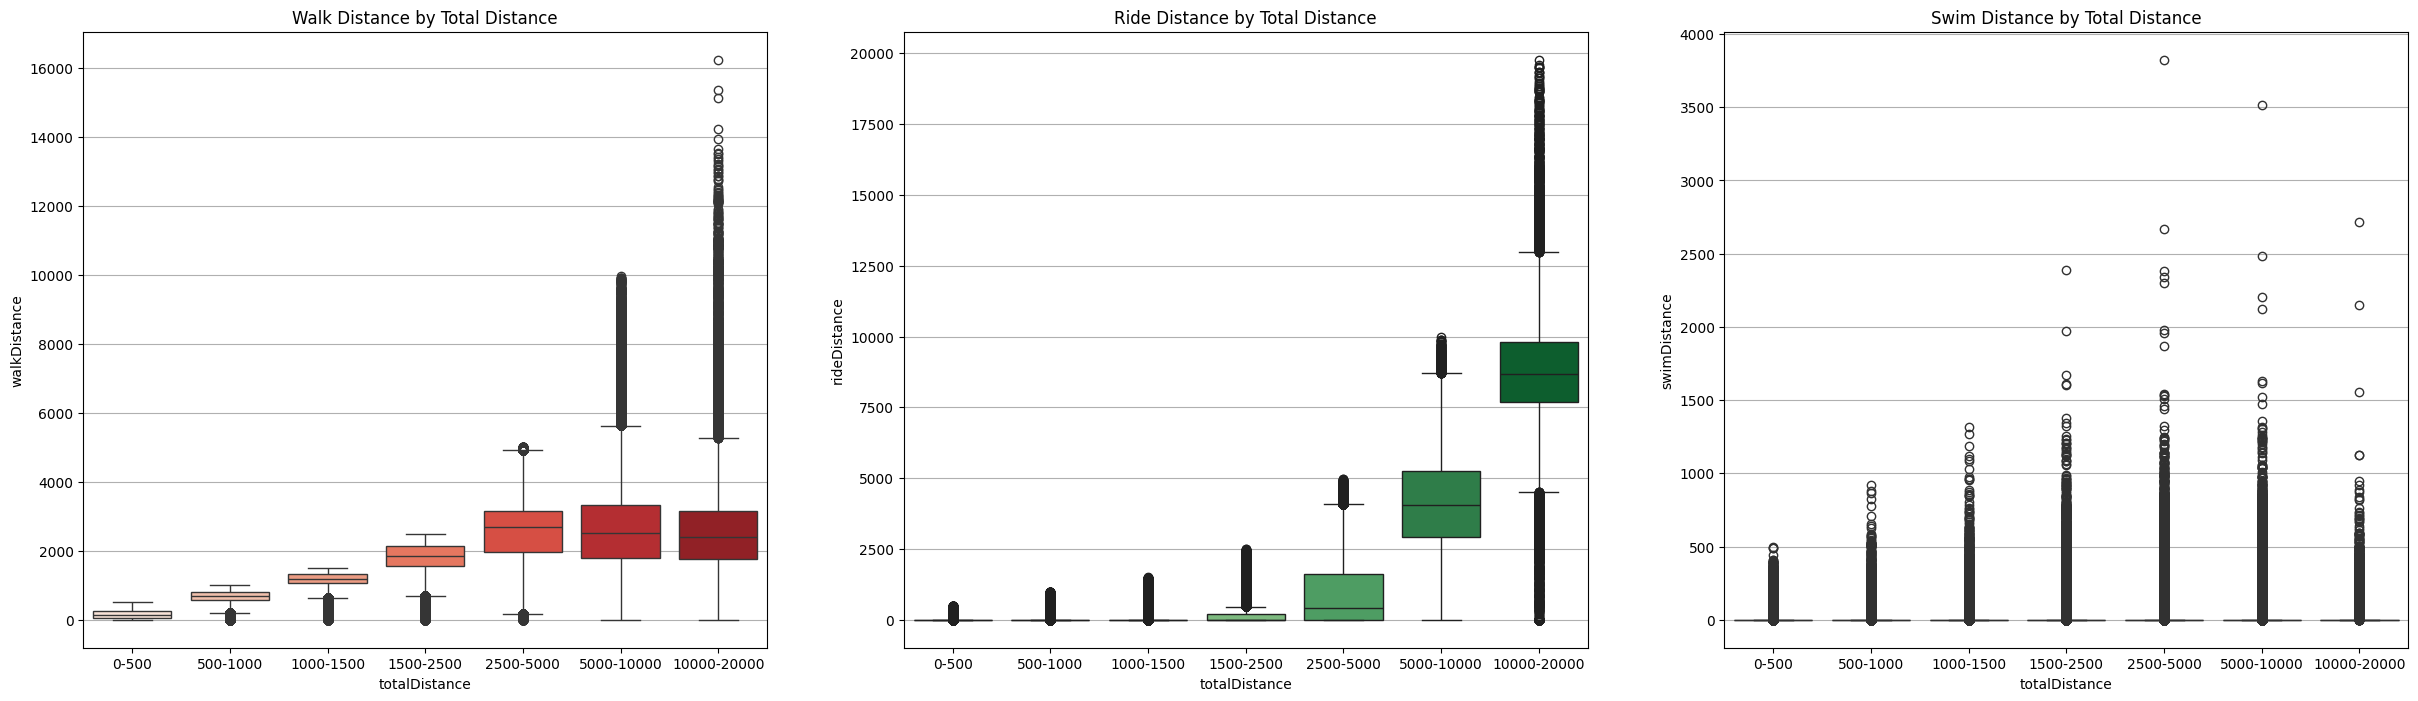

In [ ]:
# Total Distance Category by Mode of Transportation

# Visualisation
plt.figure(figsize=(30, 8))
# Walk
plt.subplot(1, 3, 1)
plt.grid()
sns.boxplot(x='category_distance', y='walkDistance', data=data, palette="Reds")
plt.xlabel("totalDistance")
plt.ylabel("walkDistance")
plt.title('Walk Distance by Total Distance')
# Ride
plt.subplot(1, 3, 2)
plt.grid()
sns.boxplot(x='category_distance', y='rideDistance', data=data, palette="Greens")
plt.xlabel("totalDistance")
plt.ylabel("rideDistance")
plt.title('Ride Distance by Total Distance')
# Swim
plt.subplot(1, 3, 3)
plt.grid()
sns.boxplot(x='category_distance', y='swimDistance', data=data, palette="Blues")
plt.xlabel("totalDistance")
plt.ylabel("swimDistance")
plt.title('Swim Distance by Total Distance')

Winners Total Distance:
 count    869557.000000
mean       4014.469482
std        2300.223633
min           0.000300
25%        2548.000000
50%        3330.000000
75%        5080.000000
max       41280.000000
Name: totalDistance, dtype: float64
Losers Total Distance:
 count    3.477806e+06
mean     1.252854e+03
std      1.776123e+03
min      1.000166e-04
25%      1.290000e+02
50%      4.420000e+02
75%      1.743000e+03
max      3.820800e+04
Name: totalDistance, dtype: float64


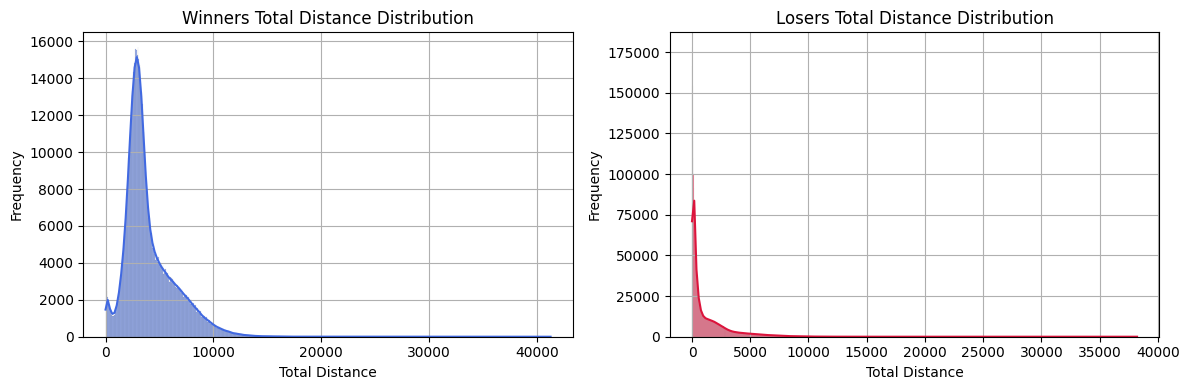

In [ ]:
## Comparison of Total Distance: Winners vs. Losers

# Filtering data for top 20%(winners) & bottom 80%(losers)
quantile_80 = data['winPlacePerc'].quantile(0.8)
winners = data[data['winPlacePerc'] >= quantile_80].copy()
losers = data[data['winPlacePerc'] < quantile_80].copy()

# Descriptive Statistics
print("Winners Total Distance:\n", winners['totalDistance'].describe())
print("Losers Total Distance:\n", losers['totalDistance'].describe())

# Visualisation
plt.figure(figsize=(12, 4))

# Winners
plt.subplot(1, 2, 1)
plt.grid()
sns.histplot(winners['totalDistance'], color='royalblue', kde=True)
plt.title('Winners Total Distance Distribution')
plt.xlabel('Total Distance')
plt.ylabel('Frequency')

# Losers
plt.subplot(1, 2, 2)
plt.grid()
sns.histplot(losers['totalDistance'], color='crimson', kde=True)
plt.title('Losers Total Distance Distribution')
plt.xlabel('Total Distance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Winners Walk Distance:
 count    869557.0000
mean             NaN
std              NaN
min           0.0003
25%        2104.0000
50%        2680.0000
75%        3240.0000
max       25776.0000
Name: walkDistance, dtype: float64
Losers Walk Distance:
 count    3.477806e+06
mean              NaN
std               NaN
min      1.000166e-04
25%      1.268125e+02
50%      4.187500e+02
75%      1.281000e+03
max      1.624800e+04
Name: walkDistance, dtype: float64


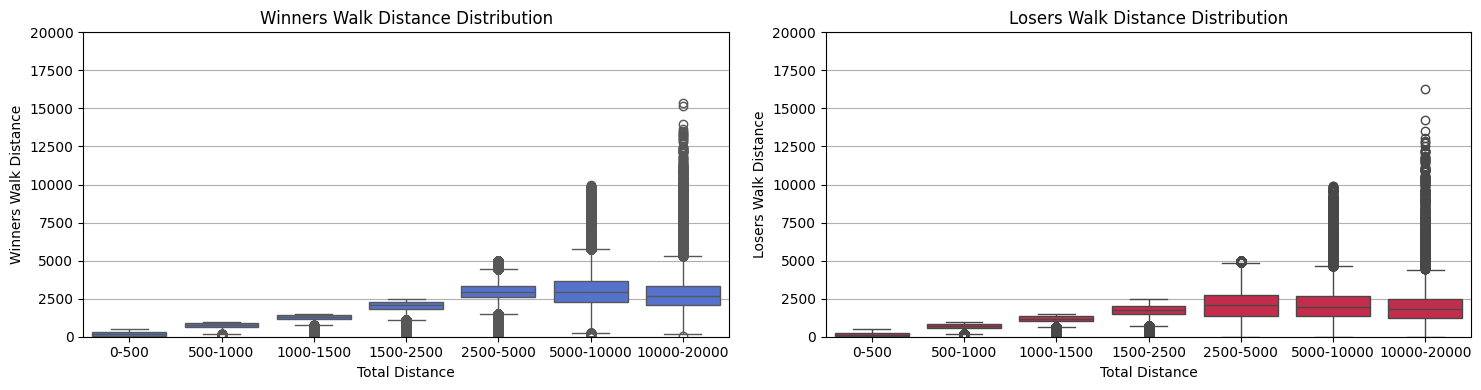

In [ ]:
# Comparison of Walk Distatnce by Total Distance Category: Winners vs. Losers

# Descriptive Statistics
print("Winners Walk Distance:\n", winners['walkDistance'].describe())
print("Losers Walk Distance:\n", losers['walkDistance'].describe())

# Visualisation
plt.figure(figsize=(15, 4))

# Winners
plt.subplot(1, 2, 1)
plt.grid()
sns.boxplot(x='category_distance', y='walkDistance', data=winners, color='royalblue')
plt.ylim(0,20000)
plt.title('Winners Walk Distance Distribution')
plt.xlabel('Total Distance')
plt.ylabel('Winners Walk Distance')

# Losers
plt.subplot(1, 2, 2)
plt.grid()
sns.boxplot(x='category_distance', y='walkDistance', data=losers, color='crimson')
plt.ylim(0,20000)
plt.title('Losers Walk Distance Distribution')
plt.xlabel('Total Distance')
plt.ylabel('Losers Walk Distance')

plt.tight_layout()
plt.show()

Winners Ride Distance:
 count    869557.0
mean          NaN
std           NaN
min           0.0
25%           0.0
50%           0.0
75%        2022.0
max       40704.0
Name: rideDistance, dtype: float64
Losers Ride Distance:
 count    3477806.0
mean           NaN
std            NaN
min            0.0
25%            0.0
50%            0.0
75%            0.0
max        37664.0
Name: rideDistance, dtype: float64


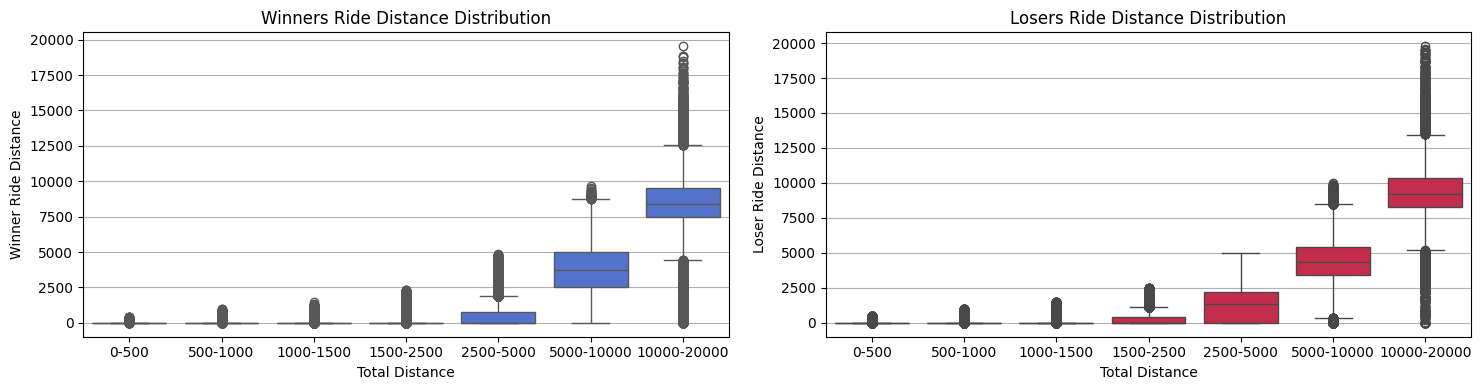

In [ ]:
# Comparison of Ride Distatnce by Total Distance Category: Winners vs. Losers

# Descriptive Statistics
print("Winners Ride Distance:\n", winners['rideDistance'].describe())
print("Losers Ride Distance:\n", losers['rideDistance'].describe())

# Visualisation
plt.figure(figsize=(15, 4))

# Winners
plt.subplot(1, 2, 1)
plt.grid()
sns.boxplot(x='category_distance', y='rideDistance', data=winners, color='royalblue')

plt.title('Winners Ride Distance Distribution')
plt.xlabel('Total Distance')
plt.ylabel('Winner Ride Distance')

# Losers
plt.subplot(1, 2, 2)
plt.grid()
sns.boxplot(x='category_distance', y='rideDistance', data=losers, color='crimson')

plt.title('Losers Ride Distance Distribution')
plt.xlabel('Total Distance')
plt.ylabel('Loser Ride Distance')

plt.tight_layout()
plt.show()

# kill Analysis

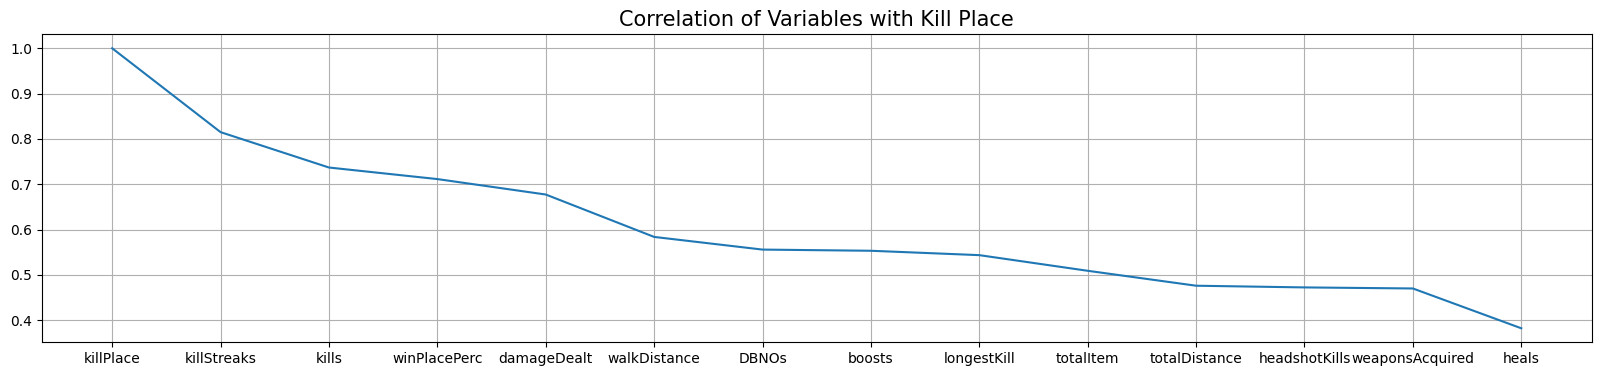

In [ ]:
# Correlation of Variables with Kill Place
killplace_correlation = abs(correlation_matrix['killPlace']).sort_values(ascending=False)

# Visualisation - Extract Top 13
plt.figure(figsize=(20,4))
plt.plot(killplace_correlation.index[:14], killplace_correlation.values[:14])
plt.title('Correlation of Variables with Kill Place', size=15)
plt.grid(True)
plt.show()

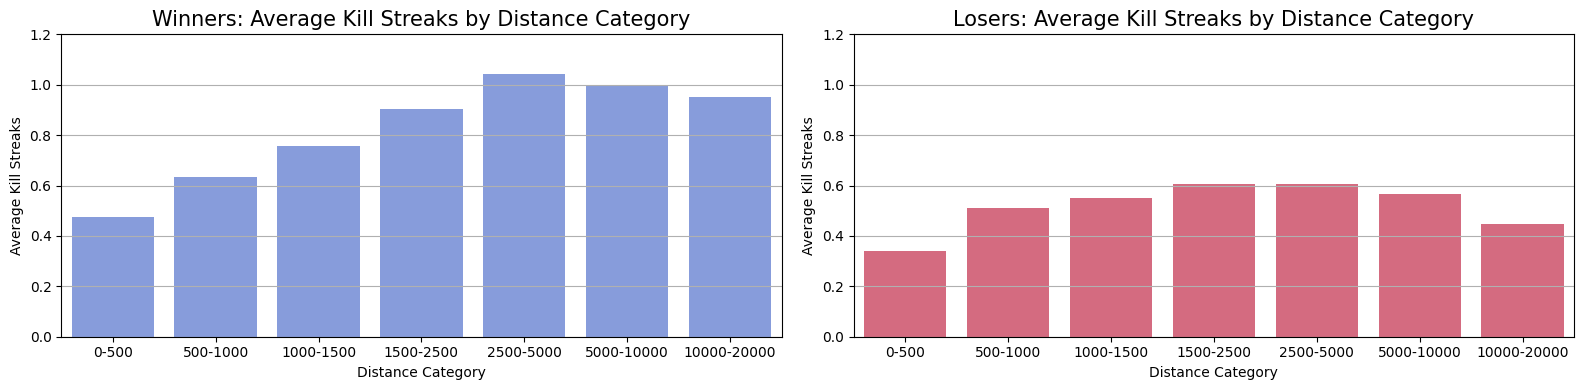

In [ ]:
## Average KillStreaks by Total Distance Category: Winners vs. Losers

# Calculate the means
winners_means = winners.groupby('category_distance')['killStreaks'].mean()
losers_means = losers.groupby('category_distance')['killStreaks'].mean()

# Visualisation
plt.figure(figsize=(16, 4))
# Winners
plt.subplot(1, 2, 1)
plt.grid()
sns.barplot(x=winners_means.index, y=winners_means.values, color='royalblue', alpha=0.7)
plt.ylim(0, 1.2)
plt.title('Winners: Average Kill Streaks by Distance Category', size=15)
plt.xlabel('Distance Category')
plt.ylabel('Average Kill Streaks')
# Losers
plt.subplot(1, 2, 2)
plt.grid()
sns.barplot(x=losers_means.index, y=losers_means.values, color='crimson', alpha=0.7)
plt.ylim(0, 1.2)
plt.title('Losers: Average Kill Streaks by Distance Category', size=15)
plt.xlabel('Distance Category')
plt.ylabel('Average Kill Streaks')

plt.tight_layout()
plt.show()


<ipython-input-27-e20afbfa7f0e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category_distance', y='kills', data=winners[winners['kills']<10], palette="Blues")
<ipython-input-27-e20afbfa7f0e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category_distance', y='kills', data=losers[losers['kills']<10], palette="Reds")


Text(0.5, 1.0, 'Losers Kills by Distance')

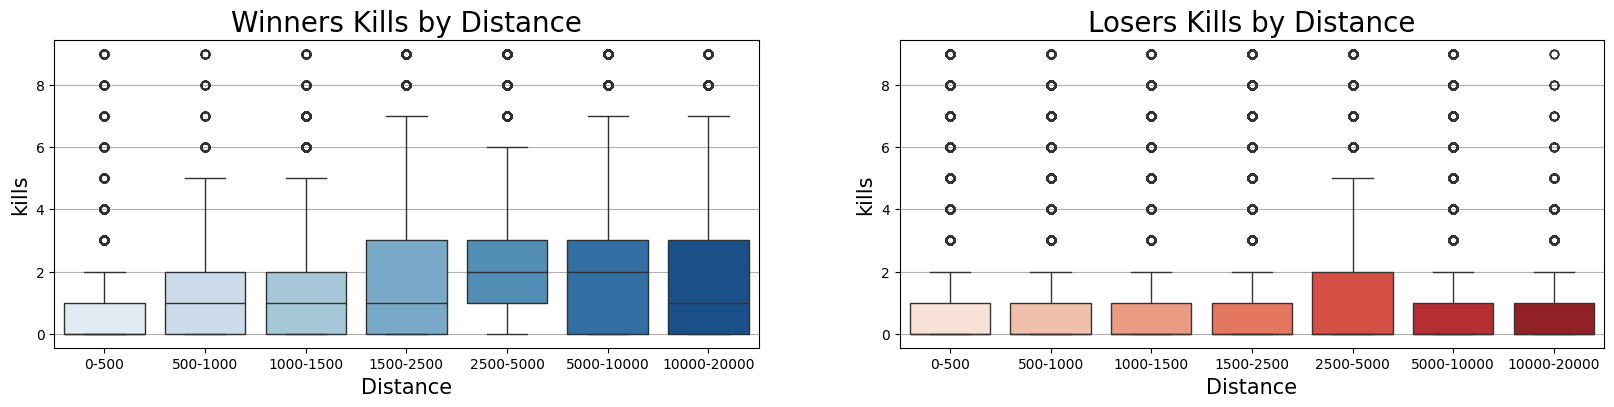

In [ ]:
# Kills by Total Distance Category: Winners vs. Losers
plt.figure(figsize=(20, 4))
# Winners
plt.subplot(1, 2, 1)
plt.grid()
sns.boxplot(x='category_distance', y='kills', data=winners[winners['kills']<10], palette="Blues")
plt.xlabel("Distance",size=15)
plt.ylabel("kills",size=15)
plt.title('Winners Kills by Distance',size=20)
# Losers
plt.subplot(1, 2, 2)
plt.grid()
sns.boxplot(x='category_distance', y='kills', data=losers[losers['kills']<10], palette="Reds")
plt.xlabel("Distance",size=15)
plt.ylabel("kills",size=15)
plt.title('Losers Kills by Distance',size=20)

Text(0.5, 1.0, 'Losers Kills')

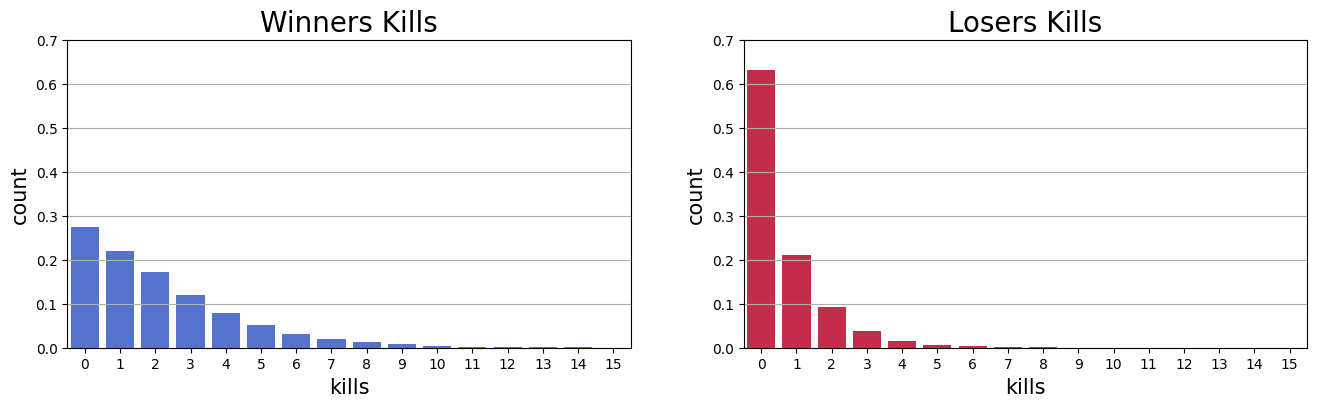

In [ ]:
## Kills Count: Winners vs. Losers

# Data Filtering
winners_kill_counts = winners[winners['kills'] <= 15]['kills'].value_counts(normalize=True)
winners_kill_counts = winners_kill_counts.sort_index()
losers_kill_counts = losers[losers['kills'] <= 15]['kills'].value_counts(normalize=True)
losers_kill_counts = losers_kill_counts.sort_index()

# Visualisation
plt.figure(figsize=(16, 4))
# Winners
plt.subplot(1, 2, 1)
plt.grid()
sns.barplot(x=winners_kill_counts.index, y=winners_kill_counts.values, color='royalblue')
plt.ylim(0,0.7)
plt.xlabel("kills",size=15)
plt.ylabel("count",size=15)
plt.title('Winners Kills',size=20)
# Losers
plt.subplot(1, 2, 2)
plt.grid()
sns.barplot(x=losers_kill_counts.index, y=losers_kill_counts.values, color='crimson')
plt.ylim(0,0.7)
plt.xlabel("kills",size=15)
plt.ylabel("count",size=15)
plt.title('Losers Kills',size=20)

<ipython-input-29-06ef485a694b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Kill Engagement', y='User Group', data=avg_killengagement, palette=custom_palette)


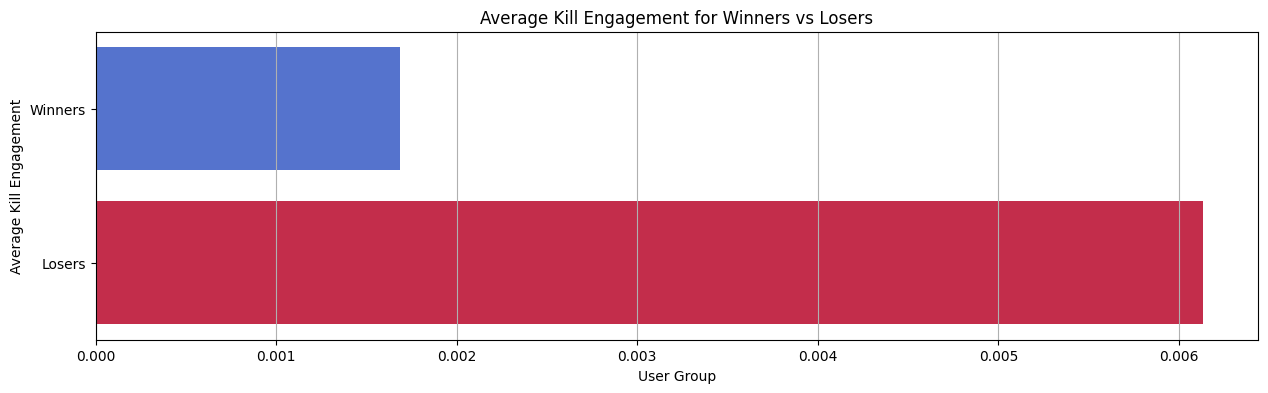

In [ ]:
## Comparison of Combat Engagement: Winners vs. Losers

# Filtering data for top 20%(winners) & bottom 80%(losers)
quantile_80 = data['winPlacePerc'].quantile(0.8)
winners = data[data['winPlacePerc'] >= quantile_80].copy()
losers = data[data['winPlacePerc'] < quantile_80].copy()

# Calculate the means
winners_avg_killengagement = winners['killEngagement'].mean()
losers_avg_killengagement = losers['killEngagement'].mean()

# Visualisation
avg_killengagement = pd.DataFrame({
    'User Group': ['Winners', 'Losers'],
    'Average Kill Engagement': [winners_avg_killengagement, losers_avg_killengagement]
})

custom_palette = ['royalblue', 'crimson']
plt.figure(figsize=(15, 4))
plt.grid()
sns.barplot(x='Average Kill Engagement', y='User Group', data=avg_killengagement, palette=custom_palette)

plt.title('Average Kill Engagement for Winners vs Losers')
plt.ylabel('Average Kill Engagement')
plt.xlabel('User Group')
plt.show()

# Item Analysis

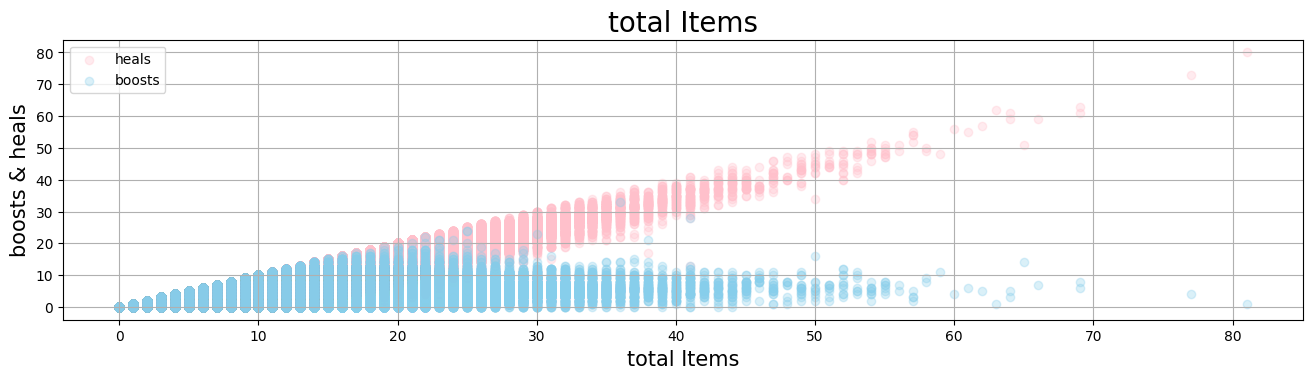

In [ ]:
## Total Items

# Creation of Total Items Variable
winners["totalItem"]=winners["boosts"]+winners["heals"]
losers["totalItem"]=losers["boosts"]+losers["heals"]

# Visualisation
plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
plt.grid()
x1=data['totalItem']
y1=data['heals']
x2=data['totalItem']
y2=data['boosts']
plt.scatter(x1, y1, color='pink', alpha=0.3, label = 'heals')
plt.scatter(x2, y2, color='skyblue', alpha=0.3, label = 'boosts')
plt.xlabel("total Items",size=15)
plt.ylabel("boosts & heals",size=15)
plt.title('total Items',size=20)
plt.legend()
plt.show()


In [ ]:
## Number of Boosts Usage: Winners vs. Losers

# Data Filtering
winners_boosts_filtered = winners[winners['boosts'] <= 15]
losers_boosts_filtered = losers[losers['boosts'] <= 15]

# Visualisation
plt.figure(figsize=(20, 4))
# Winners
plt.subplot(1, 2, 1)
plt.grid()
sns.countplot(data=winners_boosts_filtered, x="boosts", alpha=1, palette='Blues')
plt.xlabel('boosts',size=15)
plt.ylabel('count',size=15)
plt.title('Winners boosts use',size=20)
# Losers
plt.subplot(1, 2, 2)
plt.grid()
sns.countplot(data=losers_boosts_filtered, x="boosts", alpha=1, palette='Reds')
plt.xlabel('boosts',size=15)
plt.ylabel('count',size=15)
plt.title('Losers boosts use',size=20)

In [ ]:
# Boosts Usage by Total Distance Category: Winners vs. Losers

# Visualisation
plt.figure(figsize=(20, 4))
# Winners
plt.subplot(1, 2, 1)
plt.grid()
sns.boxplot(x='category_distance', y='boosts', data=winners_boosts_filtered, palette='Blues')
plt.xlabel("Distance",size=15)
plt.ylabel("Boosts",size=15)
plt.title('Winner Boosts by Distance',size=20)
# Losers
plt.subplot(1, 2, 2)
plt.grid()
sns.boxplot(x='category_distance', y='boosts', data=losers_boosts_filtered, palette='Reds')
plt.xlabel("Distance",size=15)
plt.ylabel("Boosts",size=15)
plt.title('Losers Boosts by Distance',size=20)

In [ ]:
# Heals Usage by Total Distance Category: Winners vs. Losers

# Data Filtering
winners_heals_filtered = winners[winners['heals'] <= 15]
losers_heals_filtered = losers[losers['heals'] <= 15]

# Visualisation
plt.figure(figsize=(20, 4))
# Winners
plt.subplot(1, 2, 1)
plt.grid()
sns.boxplot(x='category_distance', y='heals', data=winners_heals_filtered, palette='Greens')
plt.xlabel("Distance",size=15)
plt.ylabel("Heals",size=15)
plt.title('Winner Heals by Distance',size=20)
# Losers
plt.subplot(1, 2, 2)
plt.grid()
sns.boxplot(x='category_distance', y='heals', data=losers_heals_filtered, palette='Oranges')
plt.xlabel("Distance",size=15)
plt.ylabel("Heals",size=15)
plt.title('Losers Heals by Distance',size=20)

In [ ]:
## Weapons Acquired by Total Distance Category: Winners vs. Losers

# Data Filtering
winners_weaponsAcquired_filtered = winners[winners['weaponsAcquired'] <= 20]
losers_weaponsAcquired_filtered = losers[losers['weaponsAcquired'] <= 20]

# Visualisation
plt.figure(figsize=(18, 4))
# Winners
plt.subplot(1, 2, 1)
plt.grid()
sns.boxplot(x='category_distance', y='weaponsAcquired', data=winners_weaponsAcquired_filtered, palette='YlGnBu')
plt.xlabel("Distance",size=15)
plt.ylabel("weaponsAcquired",size=15)
plt.title('Winner Weapons Acquired by Distance',size=20)
# Losers
plt.subplot(1, 2, 2)
plt.grid()
sns.boxplot(x='category_distance', y='weaponsAcquired', data=losers_weaponsAcquired_filtered, palette='YlOrRd')
plt.xlabel("Distance",size=15)
plt.ylabel("weaponsAcquired",size=15)
plt.title('Losers Weapons Acquired by Distance',size=20)

In [ ]:
## Average Weapons Acquired: Winners vs. Losers

Calculate the means
winners_avg_weapons = winners['weaponsAcquired'].mean()
losers_avg_weapons = losers['weaponsAcquired'].mean()


# Visualisation
avg_weaponsacquired = pd.DataFrame({
    'User Group': ['Winners', 'Losers'],
    'Average Weapons Acquired': [winners_avg_weapons, losers_avg_weapons]
})
custom_palette = ['royalblue', 'crimson']

plt.figure(figsize=(4, 4))
plt.grid()
sns.barplot(y='Average Weapons Acquired', x='User Group', data=avg_weaponsacquired, palette=custom_palette)
plt.ylabel('Average Weapons Acquired')
plt.title('Average Weapons Acquired: Winners vs. Losers')
plt.show()